# Assignment 2
For this assignment you'll be looking at 2017 data on immunizations from the CDC. Your datafile for this assignment is in [assets/NISPUF17.csv](assets/NISPUF17.csv). A data users guide for this, which you'll need to map the variables in the data to the questions being asked, is available at [assets/NIS-PUF17-DUG.pdf](assets/NIS-PUF17-DUG.pdf). **Note: you may have to go to your Jupyter tree (click on the Coursera image) and navigate to the assignment 2 assets folder to see this PDF file).**

## Question 1
Write a function called `proportion_of_education` which returns the proportion of children in the dataset who had a mother with the education levels equal to less than high school (<12), high school (12), more than high school but not a college graduate (>12) and college degree.

*This function should return a dictionary in the form of (use the correct numbers, do not round numbers):* 
```
    {"less than high school":0.2,
    "high school":0.4,
    "more than high school but not college":0.2,
    "college":0.2}
```


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("assets/NISPUF17.csv", index_col=0)

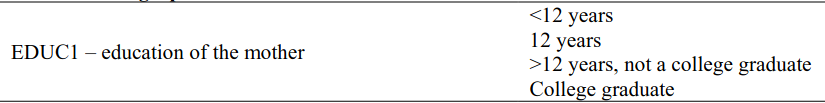

In [3]:
def proportion_of_education():
    global df
    educ_mother = df.groupby(["EDUC1"]).agg({"EDUC1": "count"})
    ratio = educ_mother["EDUC1"] / educ_mother["EDUC1"].sum()
    return ratio.rename(
        index={
            1: "less than high school",
            2: "high school",
            3: "more than high school but not college",
            4: "college",
        }
    ).to_dict()
    raise NotImplementedError()

In [4]:
assert type(proportion_of_education()) == type({}), "You must return a dictionary."
assert (
    len(proportion_of_education()) == 4
), "You have not returned a dictionary with four items in it."
assert (
    "less than high school" in proportion_of_education().keys()
), "You have not returned a dictionary with the correct keys."
assert (
    "high school" in proportion_of_education().keys()
), "You have not returned a dictionary with the correct keys."
assert (
    "more than high school but not college" in proportion_of_education().keys()
), "You have not returned a dictionary with the correct keys."
assert (
    "college" in proportion_of_education().keys()
), "You have not returned a dictionary with the correct keys."

In [5]:
proportion_of_education()

{'less than high school': 0.10202002459160373,
 'high school': 0.172352011241876,
 'more than high school but not college': 0.24588090637625154,
 'college': 0.47974705779026877}

## Question 2

Let's explore the relationship between being fed breastmilk as a child and getting a seasonal influenza vaccine from a healthcare provider. Return a tuple of the average number of influenza vaccines for those children we know received breastmilk as a child and those who know did not.

*This function should return a tuple in the form (use the correct numbers:*
```
(2.5, 0.1)
```

In [6]:
def average_influenza_doses():
    global df
    df[["CBF_01", "P_NUMFLU"]].sum()
    cbf_numflu = df.groupby(["CBF_01"]).agg({"P_NUMFLU": "mean"})
    return (cbf_numflu.P_NUMFLU.iloc[0], cbf_numflu.P_NUMFLU.iloc[1])
    raise NotImplementedError()

In [7]:
average_influenza_doses()

(1.8799187420058687, 1.5963945918878317)

In [8]:
assert (
    len(average_influenza_doses()) == 2
), "Return two values in a tuple, the first for yes and the second for no."

## Question 3
It would be interesting to see if there is any evidence of a link between vaccine effectiveness and sex of the child. Calculate the ratio of the number of children who contracted chickenpox but were vaccinated against it (at least one varicella dose) versus those who were vaccinated but did not contract chicken pox. Return results by sex. 

*This function should return a dictionary in the form of (use the correct numbers):* 
```
    {"male":0.2,
    "female":0.4}
```

Note: To aid in verification, the `chickenpox_by_sex()['female']` value the autograder is looking for starts with the digits `0.0077`.

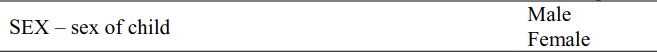

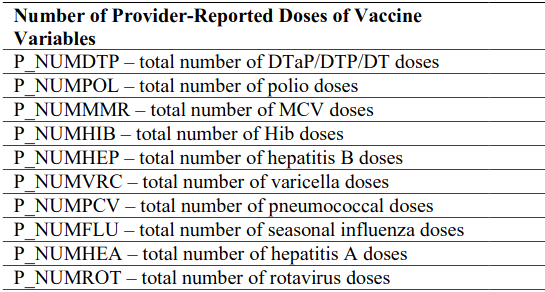

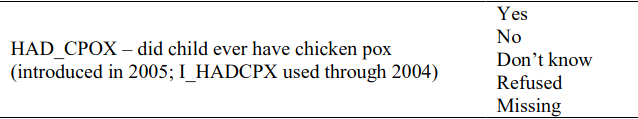

In [9]:
def chickenpox_by_sex():
    global df
    cpo_sex = df[df["P_NUMVRC"].gt(0)]
    cpo_sex = cpo_sex[["HAD_CPOX", "SEX"]]

    len(cpo_sex[(cpo_sex.HAD_CPOX == 1) & (cpo_sex.SEX == 1)]) / len(
        cpo_sex[(cpo_sex.HAD_CPOX == 2) & (cpo_sex.SEX == 1)]
    )
    chickenpox_by_sex = {"male": 0, "female": 0}
    chickenpox_by_sex["male"] = len(
        cpo_sex[(cpo_sex.HAD_CPOX == 1) & (cpo_sex.SEX == 1)]
    ) / len(cpo_sex[(cpo_sex.HAD_CPOX == 2) & (cpo_sex.SEX == 1)])
    chickenpox_by_sex["female"] = len(
        cpo_sex[(cpo_sex.HAD_CPOX == 1) & (cpo_sex.SEX == 2)]
    ) / len(cpo_sex[(cpo_sex.HAD_CPOX == 2) & (cpo_sex.SEX == 2)])
    return chickenpox_by_sex
    raise NotImplementedError()

In [10]:
chickenpox_by_sex()

{'male': 0.009675583380762664, 'female': 0.0077918259335489565}

In [11]:
assert (
    len(chickenpox_by_sex()) == 2
), "Return a dictionary with two items, the first for males and the second for females."

## Question 4
A correlation is a statistical relationship between two variables. If we wanted to know if vaccines work, we might look at the correlation between the use of the vaccine and whether it results in prevention of the infection or disease [1]. In this question, you are to see if there is a correlation between having had the chicken pox and the number of chickenpox vaccine doses given (varicella).

Some notes on interpreting the answer. If the `had_chickenpox_column` is either `1` (for yes) or `2` for no, and that the `num_chickenpox_vaccine_column` is the number of doses a child has been given of the varicella vaccine, then a positive correlation (e.g. `corr > 0`) would mean that an increase in `had_chickenpox_column` (which means more no's) would mean an increase in the `num_chickenpox_vaccine_column` (which means more doses of vaccine). If `corr < 0` then there is a negative correlation, indicating that having had chickenpox is related to an increase in the number of vaccine doses. Also, `pval` refers to the probability the relationship observed is significant. In this case `pval` should be very very small (will end in `e-18` indicating a very small number), which means the result unlikely to be by chance.

[1] This isn't really the full picture, since we are not looking at when the dose was given. It's possible that children had chickenpox and then their parents went to get them the vaccine. Does this dataset have the data we would need to investigate the timing of the dose?

In [12]:
def corr_chickenpox():
    import numpy as np
    import pandas as pd
    import scipy.stats as stats

    global df
    chickenpox = df[df["HAD_CPOX"].lt(3)]
    chickenpox = chickenpox[["HAD_CPOX", "SEX", "P_NUMVRC"]].dropna()

    corr, pval = stats.pearsonr(chickenpox["HAD_CPOX"], chickenpox["P_NUMVRC"])

    return corr
    raise NotImplementedError()

In [13]:
corr_chickenpox()

0.07044873460148016

In [14]:
assert (
    -1 <= corr_chickenpox() <= 1
), "You must return a float number between -1.0 and 1.0."